In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('input/games.csv')
df.head(10)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   
5  MsoDV9wj  False  1.504240e+12  1.504240e+12      5           draw   draw   
6  qwU9rasv   True  1.504230e+12  1.504230e+12     33         resign  white   
7  RVN0N3VK  False  1.503680e+12  1.503680e+12      9         resign  black   
8  dwF3DJHO   True  1.503510e+12  1.503510e+12     66         resign  black   
9  afoMwnLg   True  1.503440e+12  1.503440e+12    119           mate  white   

  increment_code            white_id  white_rating            black_id  \
0           15+2            bourgris          1500                a-00   
1           5+10                a-00          1322           skinnerua   
2           5+10              ischia          1496                a-00   
3           20+0       daniamurashov          1439        adivanov2009   
4           30+3           nik221107          1523        adivanov2009   
5           10+0           trelynn17          1250       franklin14532   
6           10+0             capa_jr          1520  daniel_likes_chess   
7          15+30  daniel_likes_chess          1413            soultego   
8           15+0           ehabfanri          1439  daniel_likes_chess   
9           10+0  daniel_likes_chess          1381             mirco25   

   black_rating                                              moves  \
0          1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1          1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2          1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3          1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4          1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
5          1002                                   e4 c5 Nf3 Qa5 a3   
6          1423  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...   
7          2108                     e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4   
8          1392  e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...   
9          1209  e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...   

  opening_eco                                       opening_name  opening_ply  
0         D10                   Slav Defense: Exchange Variation            5  
1         B00             Nimzowitsch Defense: Kennedy Variation            4  
2         C20              King's Pawn Game: Leonardis Variation            3  
3         D02             Queen's Pawn Game: Zukertort Variation            3  
4         C41                                   Philidor Defense            5  
5         B27               Sicilian Defense: Mongoose Variation            4  
6         D00         Blackmar-Diemer Gambit: Pietrowsky Defense           10  
7         B00  Nimzowitsch Defense: Kennedy Variation |  Link...            5  
8         C50              Italian Game: Schilling-Kostic Gambit            6  
9         B01      Scandinavian Defense: Mieses-Kotroc Variation            4

In [3]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [4]:
df.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000

In [5]:
x = df.drop(columns=['opening_eco'])
print(x)

             id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      

In [6]:
y = df['opening_eco']
print(y)

0        D10
1        B00
2        C20
3        D02
4        C41
        ... 
20053    A80
20054    A41
20055    D00
20056    B07
20057    D00
Name: opening_eco, Length: 20058, dtype: object


In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
x= x.apply(label_encoder.fit_transform)
print(x)

          id  rated  created_at  last_move_at  turns  victory_status  winner  \
0       9068      0       11904         11907     12               2       2   
1      14512      1       11628         11635     15               3       0   
2      14904      1       11628         11635     60               1       2   
3      14350      1       11541         11550     60               1       2   
4       3091      1       11317         11325     94               1       2   
...      ...    ...         ...           ...    ...             ...     ...   
20053   4563      1        7739          7733     23               3       2   
20054   9954      1        7707          7701     81               1       0   
20055  18757      1        7706          7700     34               1       2   
20056  11344      1        7705          7699    108               3       2   
20057   7145      1        7701          7694     77               1       0   

       increment_code  white_id  white_

In [8]:
y= label_encoder.fit_transform(y)
print(y)

[248  71 171 ... 239  78 239]


In [9]:
import matplotlib.pyplot as plt

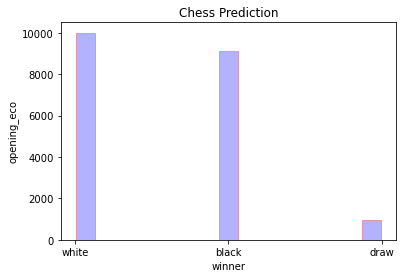

In [10]:
#plotting histogram 
plt.hist(df['winner'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('winner') 
plt.ylabel('opening_eco') 

#plot title 
plt.title('Chess Prediction') 
plt.show();

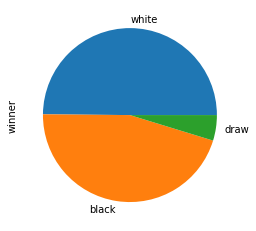

In [11]:
df['winner'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [12]:
import seaborn as sns

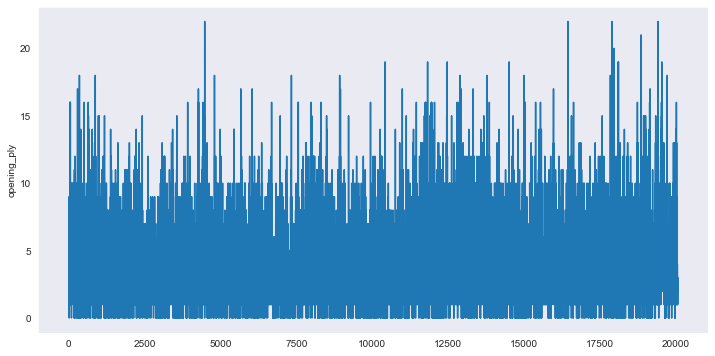

In [13]:
z = x['opening_ply']
# Change the style of the figure to the "dark" theme
sns.set_style("dark")

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=z)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


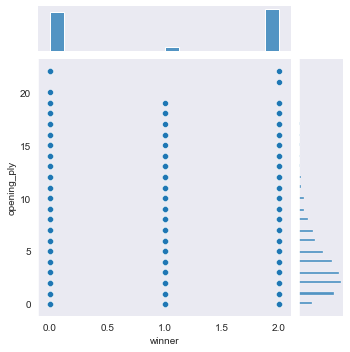

In [14]:
sns.jointplot(x="winner", y="opening_ply", data=x, size=5)

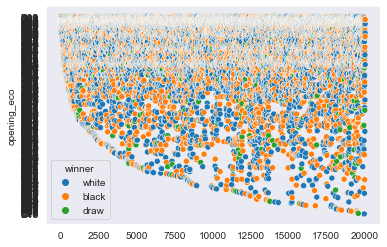

In [15]:
sns.scatterplot(x=df.index,y=df['opening_eco'],hue=df['winner'])

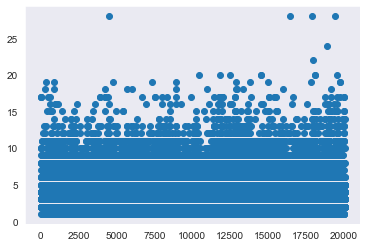

In [16]:
plt.scatter(df.index,df['opening_ply'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11906ff40>,
 'caps': [<matplotlib.lines.Line2D at 0x11b09a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b263be0>],
 'medians': [<matplotlib.lines.Line2D at 0x11b09a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b09aa00>],
 'means': []}

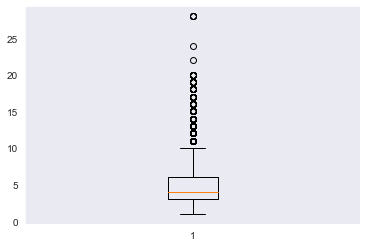

In [17]:
plt.boxplot(df['opening_ply'])

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.8153040877367896


In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)


print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9411764705882353
